<a href="https://colab.research.google.com/github/thanh31596/646/blob/main/646.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import PIL 
from PIL import Image 
import pandas as pd 
import numpy as np
batch_size = 16 
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import os
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np
#The dimension of the images we are going to define is 500x500 
import h5py


# 1. PRE-PROCESSING DATA

In [2]:
labels = ['COVID', 'Normal','Pneumonia']
img_size = 50
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data
    #return np.array(data)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flat.csv')
sample = np.load("/content/drive/MyDrive/Colab Notebooks/sample.npy",allow_pickle=True)
label = np.load("/content/drive/MyDrive/Colab Notebooks/label.npy",allow_pickle=True)

# train.data.shape
# train = h5py.File('/content/drive/MyDrive/Colab Notebooks/data.h5', 'r')
train=pd.DataFrame(sample, columns=['flat'])
train['label']=label
arr=[]
for i in train['flat']:
  arr.append(i.reshape(50,50,3))
train['data']=arr

In [5]:
data = pd.DataFrame(train,columns=['data','label'])
#data.to_excel('data.xlsx')
data.data[0].shape

(50, 50, 3)

In [6]:
X = data['data'].values
y = data['label'].values
#For ML 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
#FOR DL
# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)
# X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.33)
y_train_label = []

for i in y_train: 
    if i == 0:
        y_train_label.append("COVID")
    if i == 1:
        y_train_label.append("Normal")
    if i == 2:
        y_train_label.append("Pneumonia")
np.unique(y_train)


array([0, 1, 2], dtype=object)

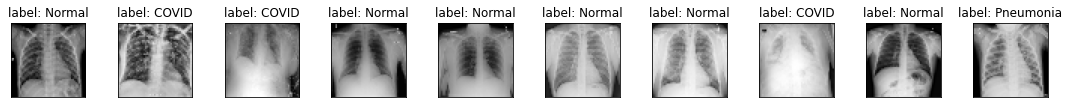

In [7]:
fig = plt.figure(figsize=(15,10))
label = ""
for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(X_train[i])

    ax.set_title('label: '+str(y_train_label[i]))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()
plt.show()

# 2. METHODS:
## A. DEEPLEARNING - CNN: 

In [8]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,ZeroPadding2D,Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [9]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(50,50,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 49, 49, 32)        416       
                                                                 
 activation (Activation)     (None, 49, 49, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        4128      
                                                                 
 activation_1 (Activation)   (None, 23, 23, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                    

In [10]:
# from tensorflow.keras.utils import plot_model
# plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

In [11]:
x_train_tensor=[]
for i in X_train:
    x_train_tensor.append(tf.convert_to_tensor(i,dtype='float32'))
x_test_tensor=[]
for i in X_test:
    x_test_tensor.append(tf.convert_to_tensor(i,dtype='float32'))
y_train_tensor=[]
for i in y_train:
    y_train_tensor.append(tf.convert_to_tensor(i))

y_test_tensor=[]
for i in y_test:
    y_test_tensor.append(tf.convert_to_tensor(i))


In [12]:
print("x_train:{0}, y_train:{1}, x_test:{2}, y_test:{3}".format(len(x_train_tensor),len(y_train_tensor),len(x_test_tensor),len(y_test_tensor)))
x_list=np.array(x_train_tensor)
xtest_list=np.array(x_test_tensor)
y_list=np.array(y_train_tensor)
y_list=pd.get_dummies(y_list).values
ytest_list=np.array(y_test_tensor)
ytest_list=pd.get_dummies(ytest_list).values
x_train=tf.convert_to_tensor(x_list)
x_test=tf.convert_to_tensor(xtest_list)
y1_train=tf.convert_to_tensor(y_list)
y1_test=tf.convert_to_tensor(ytest_list)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
callbacks=[stop_early]

x_train:10152, y_train:10152, x_test:5001, y_test:5001


In [13]:
history=model.fit(x_train, y1_train, shuffle=True, epochs=50, validation_data=(x_test, y1_test),callbacks=callbacks)              

Epoch 1/50
318/318 [==============================] - 4s 8ms/step - loss: 0.8895 - accuracy: 0.6636 - val_loss: 0.5587 - val_accuracy: 0.7457
Epoch 2/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5852 - accuracy: 0.7349 - val_loss: 0.5341 - val_accuracy: 0.7630
Epoch 3/50
318/318 [==============================] - 2s 7ms/step - loss: 0.5197 - accuracy: 0.7673 - val_loss: 0.4612 - val_accuracy: 0.8074
Epoch 4/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4793 - accuracy: 0.7901 - val_loss: 0.4799 - val_accuracy: 0.8026
Epoch 5/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4549 - accuracy: 0.8027 - val_loss: 0.4260 - val_accuracy: 0.8156
Epoch 6/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4208 - accuracy: 0.8182 - val_loss: 0.4351 - val_accuracy: 0.8202
Epoch 7/50
318/318 [==============================] - 2s 7ms/step - loss: 0.4073 - accuracy: 0.8252 - val_loss: 0.4012 - val_accuracy: 0.8326
Epoch 

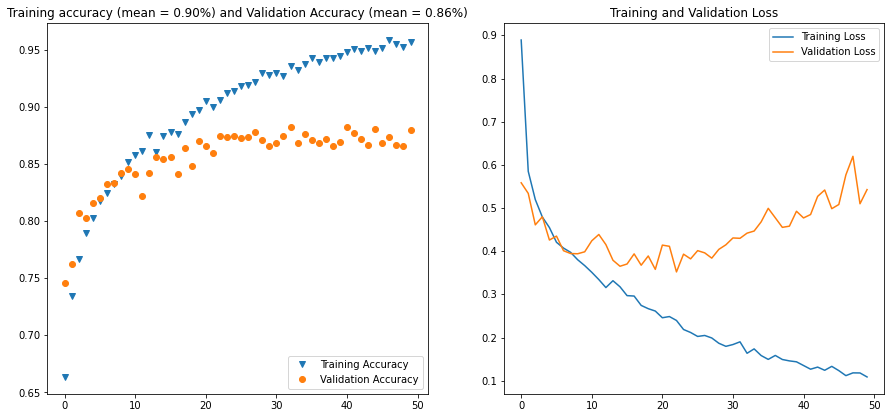

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.title('CNN')
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,'v', label='Training Accuracy')
plt.plot(epochs_range, val_acc,'o', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training accuracy (mean = {0:.2f}%) and Validation Accuracy (mean = {1:.2f}%)'.format(np.mean(history.history['accuracy']),np.mean(history.history['val_accuracy'])))

plt.subplot(2, 2, 2)
# yerr = np.linspace(0.05, 0.2, 10)
# plt.errorbar(epochs_range, loss, yerr=yerr, label='both limits (default)')

# plt.errorbar(epochs_range, loss, yerr=yerr, uplims=True, label='uplims=True')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

In [15]:
y_pred_cnn = model.predict(x_test)
y_pred_cnn

array([[2.6428188e-06, 2.1048952e-03, 9.9789244e-01],
       [3.8188759e-06, 9.9999619e-01, 3.2631799e-13],
       [4.3681683e-03, 9.9563181e-01, 2.5650921e-09],
       ...,
       [9.9923050e-01, 7.6950045e-04, 4.5481170e-09],
       [5.2344097e-12, 1.0000000e+00, 9.0204637e-33],
       [8.1152864e-02, 9.1884720e-01, 1.3935134e-08]], dtype=float32)

In [16]:
y_round=np.round(y_pred_cnn)
converted_y=[]
for i in y_round:
    converted_y.append(np.argmax(i))
converted_y=np.array(converted_y)
converted_y.shape

(5001,)

In [17]:
from mlxtend.plotting import plot_decision_regions
np.unique(converted_y)

array([0, 1, 2])

In [18]:
from sklearn.metrics import confusion_matrix
a = [] 
for i in y_test:
    a.append(i)
a = np.array(a)



In [19]:
cm=confusion_matrix(a,converted_y)
results = pd.DataFrame()
results['true']=y_test
results['CNN']=converted_y

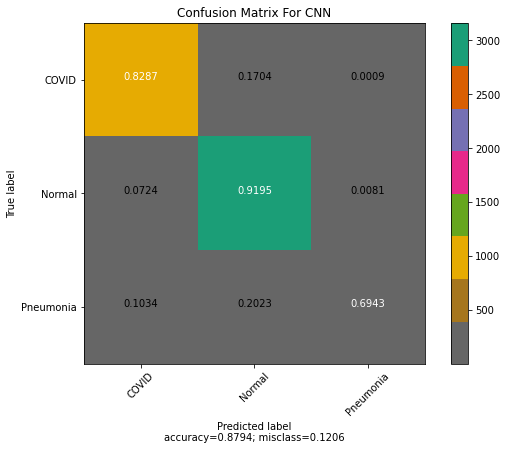

In [147]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('BuGn')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
  
plot_confusion_matrix(cm,target_names=['COVID','Normal','Pneumonia'],title='Confusion Matrix For CNN',cmap='Dark2_r')

# B. ML-BASED: Random Forest 

In [21]:
from sklearn.ensemble import RandomForestClassifier


In [22]:
# clf  = RandomForestClassifier(n_estimators=10)
x_train_flat=[]
for i in X_train:
    x_train_flat.append(i.flatten())
x_test_flat=[]
for i in X_test:
    x_test_flat.append(i.flatten())
y_train_binary = []
for i in y_train: 
    if i>0: 
        y_train_binary.append(1)

In [23]:
y_train_rf= np.asarray(y_train, dtype="int")
x_train_flat =np.array(x_train_flat)
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train_flat, y_train_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [24]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_train_flat, y_train_rf)

In [25]:
# # from sklearn.utils import shuffle
# # X_ = X.reshape(X.shape[0]*X.shape[1],X.shape[2]).T
# # y_ = y.reshape(y.shape[0],)
# # X, y = shuffle(X, y, random_state=42)
# x_train_flat=[]
# for i in X_train:
#     x_train_flat.append(i.flatten())
# x_test_flat=[]
# for i in X_test:
#     x_test_flat.append(i.flatten())

In [26]:
# clf.fit(x_train_flat, y_train)
y_test_rf= np.asarray(y_test, dtype="int")

In [27]:
from sklearn.metrics import accuracy_score,f1_score,plot_precision_recall_curve,plot_roc_curve,classification_report, confusion_matrix

preds = classifier.predict(x_test_flat)
print("Accuracy:", accuracy_score(y_test_rf,preds))

Accuracy: 0.8970205958808238


In [28]:
# from sklearn.model_selection import RandomizedSearchCV
# from pprint import pprint
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 15, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# pprint(random_grid)
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestClassifier(n_estimators=10)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(x_train_flat, y_train)

## C. ML-BASED SVM

In [29]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf']}
 

# clf_svm = svm.SVC()
# grid = GridSearchCV(clf_svm, param_grid, refit = True, verbose = 3)
# clf_svm.fit(x_train_flat, y_train_rf)

# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)

In [31]:
model = svm.SVC()
model.fit(np.array(x_train_flat)[:1000], y_train_rf[:1000])
 
# print prediction results
predictions = model.predict(x_test_flat)


In [32]:
print(classification_report(y_test_rf, predictions))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63      1127
           1       0.85      0.94      0.89      3439
           2       0.88      0.81      0.84       435

    accuracy                           0.84      5001
   macro avg       0.83      0.76      0.79      5001
weighted avg       0.83      0.84      0.83      5001



In [33]:
results['SVM']=predictions
results['RandomForest'] =preds

## D. VGG network: 

In [34]:
vgg = Sequential()
vgg.add(ZeroPadding2D((1,1),input_shape=(50,50, 3)))
vgg.add(Conv2D(32, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(32, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(64, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(ZeroPadding2D((1,1)))
vgg.add(Conv2D(128, (3, 3), activation='relu'))
vgg.add(MaxPooling2D((2,2), strides=(2,2)))
 
# vgg.add(Conv2D(128, (7, 7), activation='relu'))
# vgg.add(Dropout(0.5))
# vgg.add(Conv2D(128, (1, 1), activation='relu'))
vgg.add(Dropout(0.5))
vgg.add(Conv2D(3, (1, 1)))
vgg.add(Flatten())
vgg.add(Dense(64))
vgg.add(Activation('relu'))
vgg.add(Dropout(0.5))
vgg.add(Dense(3))
vgg.add(Activation('softmax'))
vgg.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
vgg_history=vgg.fit(x_train, y1_train, shuffle=False, epochs=50, validation_data=(x_test, y1_test))

Epoch 1/50
318/318 [==============================] - 7s 16ms/step - loss: 0.7177 - accuracy: 0.6564 - val_loss: 0.5730 - val_accuracy: 0.7205
Epoch 2/50
318/318 [==============================] - 4s 14ms/step - loss: 0.5496 - accuracy: 0.7184 - val_loss: 0.5746 - val_accuracy: 0.7590
Epoch 3/50
318/318 [==============================] - 4s 14ms/step - loss: 0.4804 - accuracy: 0.7836 - val_loss: 0.4377 - val_accuracy: 0.8240
Epoch 4/50
318/318 [==============================] - 4s 14ms/step - loss: 0.4285 - accuracy: 0.8144 - val_loss: 0.3667 - val_accuracy: 0.8576
Epoch 5/50
318/318 [==============================] - 4s 14ms/step - loss: 0.3447 - accuracy: 0.8579 - val_loss: 0.3664 - val_accuracy: 0.8574
Epoch 6/50
318/318 [==============================] - 4s 14ms/step - loss: 0.3127 - accuracy: 0.8780 - val_loss: 0.2826 - val_accuracy: 0.8948
Epoch 7/50
318/318 [==============================] - 4s 14ms/step - loss: 0.2683 - accuracy: 0.8948 - val_loss: 0.2802 - val_accuracy: 0.8926

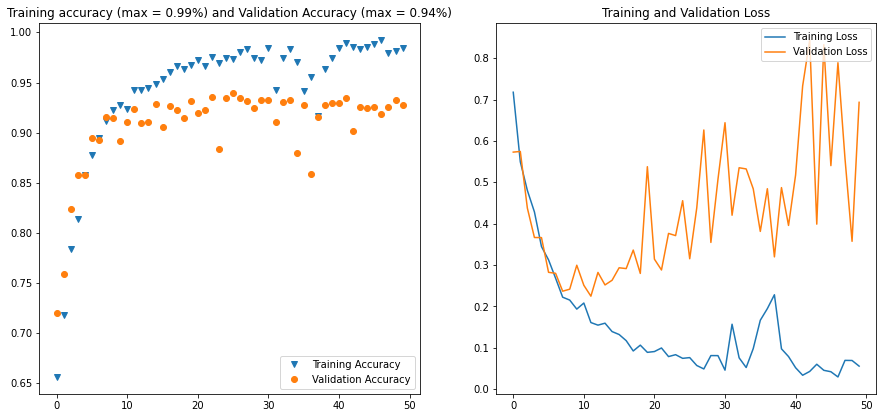

In [35]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc,'v', label='Training Accuracy')
plt.plot(epochs_range, val_acc,'o', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training accuracy (max = {0:.2f}%) and Validation Accuracy (max = {1:.2f}%)'.format(np.max(vgg_history.history['accuracy']),np.max(vgg_history.history['val_accuracy'])))

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
vgg_pred = vgg.predict(x_test)
vgg_pred

array([[0.0000000e+00, 6.2210513e-21, 1.0000000e+00],
       [6.1288837e-08, 9.9999988e-01, 1.8498618e-25],
       [7.4987003e-09, 1.0000000e+00, 2.2413116e-28],
       ...,
       [1.0355770e-03, 9.9896443e-01, 4.5984061e-13],
       [3.3746366e-26, 1.0000000e+00, 0.0000000e+00],
       [1.0771106e-18, 1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [37]:
y_round=np.round(vgg_pred)
check=[]
for i in y_round:
    check.append(np.argmax(i))
check=np.array(check)
check.shape

(5001,)

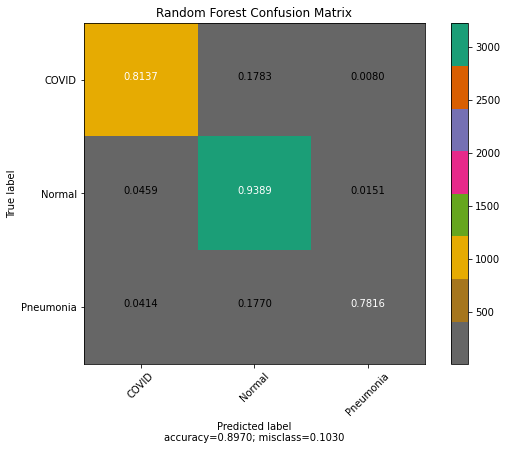

In [149]:
cm3=confusion_matrix(a,results['RandomForest'])
plot_confusion_matrix(cm3,target_names=['COVID','Normal','Pneumonia'],title='Random Forest Confusion Matrix', cmap='Dark2_r')

In [54]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(a,check)
print(accuracy_score(a,check))

0.9276144771045791


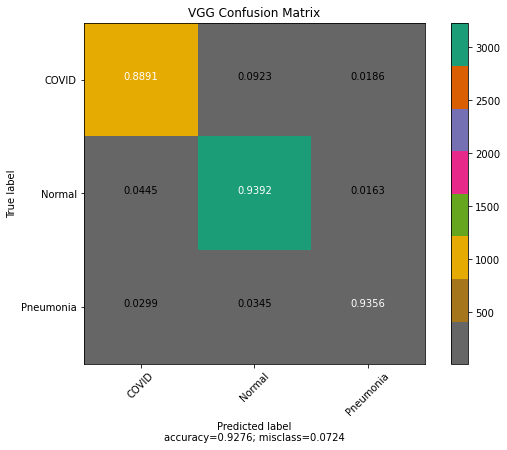

In [40]:
plot_confusion_matrix(cm2,target_names=['COVID','Normal','Pneumonia'],title='VGG Confusion Matrix', cmap='Dark2_r')

In [48]:
results['VGG']=check

In [102]:
from sklearn.metrics import f1_score, accuracy_score,plot_confusion_matrix,recall_score,precision_score,confusion_matrix,roc_auc_score
def get_metrics(x,y):
  acc = accuracy_score(x,y)
  pre = precision_score(x,y,average='macro')
  f1 = f1_score(x,y,average='macro')
  recall = recall_score(x,y,average='macro')
  cnf_matrix = confusion_matrix(x, y)
  print(cnf_matrix)

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  # Precision or positive predictive value
  PPV = TP/(TP+FP)
  # Negative predictive value
  NPV = TN/(TN+FN)
  # Fall out or false positive rate
  FPR = FP/(FP+TN)
  # False negative rate
  FNR = FN/(TP+FN)
  # False discovery rate
  FDR = FP/(TP+FP)
  # Overall accuracy
  ACC = (TP+TN)/(TP+FP+FN+TN)
  class_error = (FNR+FPR)/(TNR+FPR+FNR+TPR)
  return [acc,pre,f1,recall,class_error[0]]
results['true']=results['true'].astype('int')

In [103]:
cn = get_metrics(results['true'],results['CNN'])
cn

[[ 934  192    1]
 [ 249 3162   28]
 [  45   88  302]]


[0.8794241151769646,
 0.8638749909031964,
 0.8335900524834373,
 0.8141516979600493,
 0.1235708307699637]

In [104]:
cn = get_metrics(results['true'],results['CNN'])
sv = get_metrics(results['true'],results['SVM'])
raf = get_metrics(results['true'],results['RandomForest'])
vg = get_metrics(results['true'],results['VGG'])
visual = pd.DataFrame([cn,sv,raf,vg],columns=['accuracy','precision','f1','recall','classif_error'],index=['CNN','SVM','RF','VGG'])

[[ 934  192    1]
 [ 249 3162   28]
 [  45   88  302]]
[[ 610  509    8]
 [ 171 3228   40]
 [  18   66  351]]
[[ 917  201    9]
 [ 158 3229   52]
 [  18   77  340]]
[[1002  104   21]
 [ 153 3230   56]
 [  13   15  407]]


In [127]:
results

,true,CNN,SVM,RandomForest,VGG
0,2,2,2,2,2
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
...,...,...,...,...,...
4996,0,0,0,0,0
4997,1,1,1,1,1
4998,0,0,0,1,1
4999,1,1,1,1,1


# Visualiztion

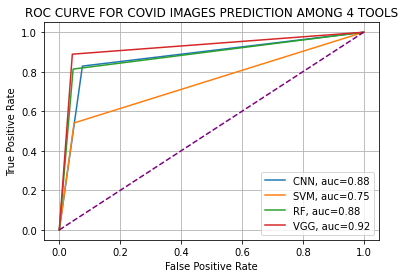

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize
n_classes = 3

y_true = label_binarize(results['true'], classes=[0,1,2])
y_score_cnn = label_binarize(results['CNN'], classes=[0,1,2])
y_score_svm = label_binarize(results['SVM'], classes=[0,1,2])
y_score_rf = label_binarize(results['RandomForest'], classes=[0,1,2])
y_score_vgg = label_binarize(results['VGG'], classes=[0,1,2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.title("ROC CURVE FOR COVID IMAGES PREDICTION AMONG 4 TOOLS")

# Plot of a ROC curve for a specific class
fpr, tpr, thresh = roc_curve(y_true[:,0], y_score_cnn[:,0])
auc = roc_auc_score(y_true[:,0], y_score_cnn[:,0])
plt.plot(fpr,tpr,label="CNN, auc={0:.2f}".format((auc)))


fpr, tpr, thresh = roc_curve(y_true[:,0],y_score_svm[:,0])
auc = roc_auc_score(y_true[:,0],y_score_svm[:,0])
plt.plot(fpr,tpr,label="SVM, auc={0:.2f}".format((auc)))

fpr, tpr, thresh = roc_curve(y_true[:,0], y_score_rf[:,0])
auc = roc_auc_score(y_true[:,0], y_score_rf[:,0])
plt.plot(fpr,tpr,label="RF, auc={0:.2f}".format((auc)))

fpr, tpr, thresh = roc_curve(y_true[:,0], y_score_vgg[:,0])
auc = roc_auc_score(y_true[:,0], y_score_vgg[:,0])
plt.plot(fpr,tpr,label="VGG, auc={0:.2f}".format((auc)))
plt.plot([0.0, 1.0], [0.0, 1.0], ls='--', c='purple')
plt.grid(1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0)

In [121]:
y_score[:,0]

IndexError: ignored

In [169]:
import plotly.express as px
import plotly.graph_objects as go
  
# read dataset from csv and perform preprocessing
data = visual.reset_index()
data.head()
  
# # remove goalkeepers data for performing fair comparison
# goalkeeper_index = data[data['Position'] == 'GK' ].index
# data.drop(index_names,inplace=True)
  
# remove columns which are not required for this visualisation purpose
plt_vars =['accuracy','precision','f1','recall','classif_error']
# data.drop(data_cols, axis =1, inplace=True)

# plot unfilled scatter plot
# plot star plot for comparison
fig = go.Figure()
  
fig.add_trace(go.Scatterpolar(
      r=pd.Series(data.loc[0].values),
      theta=plt_vars,
        marker=dict(
            color='LightSkyBlue',
            size=5,
            line=dict(
                color='LightSkyBlue',
                width=2
            )
        ),
      name=data.loc[0, 'index']
))
fig.add_trace(go.Scatterpolar(
      r=pd.Series(data.loc[1,plt_vars].values),
      theta=plt_vars,
        marker=dict(
            color='Orange',
            size=5,
            line=dict(
                color='Orange',
                width=2
            )
        ),
      name=data.loc[1, 'index']
))
fig.add_trace(go.Scatterpolar(
      r=pd.Series(data.loc[2,plt_vars].values),
      theta=plt_vars,
        marker=dict(
            color='Green',
            size=5,
            line=dict(
                color='Green',
                width=2
            )
        ),
      name=data.loc[2, 'index']
))
fig.add_trace(go.Scatterpolar(
      r=pd.Series(data.loc[3,plt_vars].values),
      theta=plt_vars,
        marker=dict(
            color='Red',
            size=5,
            line=dict(
                color='Red',
                width=2
            )
        ),
      name=data.loc[3, 'index']
))

  
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True
          )),


  showlegend=False
)

fig.show()

In [ ]:
pd.Series(data.loc[0].values)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



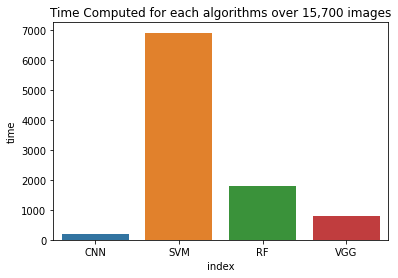

In [155]:
import seaborn as sns 
plt.title('Time Computed for each algorithms over 15,700 images')
sns.barplot(data['index'],data['time'])

In [153]:
data

,index,accuracy,precision,f1,recall,classif_error,time
0,CNN,0.879424,0.863875,0.833590,0.814152,0.123571,200
1,SVM,0.837632,0.830652,0.788877,0.762267,0.253763,6900
2,RF,0.897021,0.869195,0.856422,0.844737,0.115883,1800
3,VGG,0.927614,0.887751,0.903542,0.921315,0.076882,780


In [171]:
print(classification_report(results['true'],results['CNN']))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1127
           1       0.92      0.92      0.92      3439
           2       0.91      0.69      0.79       435

    accuracy                           0.88      5001
   macro avg       0.86      0.81      0.83      5001
weighted avg       0.88      0.88      0.88      5001



In [172]:
print(classification_report(results['true'],results['SVM']))

              precision    recall  f1-score   support

           0       0.76      0.54      0.63      1127
           1       0.85      0.94      0.89      3439
           2       0.88      0.81      0.84       435

    accuracy                           0.84      5001
   macro avg       0.83      0.76      0.79      5001
weighted avg       0.83      0.84      0.83      5001



In [173]:
print(classification_report(results['true'],results['RandomForest']))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1127
           1       0.92      0.94      0.93      3439
           2       0.85      0.78      0.81       435

    accuracy                           0.90      5001
   macro avg       0.87      0.84      0.86      5001
weighted avg       0.90      0.90      0.90      5001



In [174]:
print(classification_report(results['true'],results['VGG']))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1127
           1       0.96      0.94      0.95      3439
           2       0.84      0.94      0.89       435

    accuracy                           0.93      5001
   macro avg       0.89      0.92      0.90      5001
weighted avg       0.93      0.93      0.93      5001

